In [1]:
import pandas as pd

Read all bike rides in 2016

In [2]:
fn = '2016-Q{0}/HealthyRide Rentals 2016 Q{0}.csv'

dfs = []
for q in 1,2,3,4:
    df = pd.read_csv(fn.format(q), encoding='iso-8859-1',
                   parse_dates=['Starttime','Stoptime'])
    dfs.append(df)
    
rides = pd.concat(dfs)

In [3]:
rides.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,15335599,2016-01-01 01:44:00,2016-01-01 02:01:00,70294,1068,1026,Penn Ave & S Whitfield St,1032,Walnut St & College St,NaN
1,15335629,2016-01-01 02:39:00,2016-01-01 02:53:00,70360,892,1029,Alder St & S Highland Ave,1021,Taylor St & Liberty Ave,NaN
2,15336195,2016-01-01 10:02:00,2016-01-01 10:06:00,70369,245,1029,Alder St & S Highland Ave,1028,Penn Ave & Putnam St (Bakery Square),NaN
3,15336282,2016-01-01 10:39:00,2016-01-01 10:50:00,70304,683,1041,Fifth Ave & S Bouquet St,1047,S 22nd St & E Carson St,NaN
4,15336307,2016-01-01 10:51:00,2016-01-01 11:14:00,70345,1346,1047,S 22nd St & E Carson St,1002,Third Ave & Wood St,NaN


Get latitidue, longitude coordinates for all bike stations.

In [4]:
stations = pd.read_csv('2016-Q1/HealthyRideStations2016.csv', encoding='iso-8859-1', index_col='StationNum')
stations.head()

,StationName,RackQnty,Latitude,Longitude
StationNum,,,,
1000,Liberty & Stanwix,16,40.441326,-80.004679
1001,Forbes Ave & Market Sq,19,40.440877,-80.003080
1002,Third & Wood,15,40.439030,-80.001860
1003,First Ave & Smithfield St,15,40.437200,-80.000375
1004,First Ave & B St,15,40.435800,-79.996877


In [5]:
pickup_by_station = rides.groupby('From station id')['Trip id'].count()
dropoff_by_station = rides.groupby('To station id')['Trip id'].count()
pickup_by_station.head()

From station id
1000    3689
1001    3375
1002    1115
1003    1457
1004    1694
Name: Trip id, dtype: int64

size is the relative number of rides taken from each station.

In [6]:
stations['size'] = (pickup_by_station / pickup_by_station.max()) ** 2 * 30
stations.head()

,StationName,RackQnty,Latitude,Longitude,size
StationNum,,,,,
1000,Liberty & Stanwix,16,40.441326,-80.004679,21.745089
1001,Forbes Ave & Market Sq,19,40.440877,-80.003080,18.200840
1002,Third & Wood,15,40.439030,-80.001860,1.986523
1003,First Ave & Smithfield St,15,40.437200,-80.000375,3.392056
1004,First Ave & B St,15,40.435800,-79.996877,4.585331


In [7]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool, WheelZoomTool
from bokeh.tile_providers import STAMEN_TONER
output_notebook()

Loading BokehJS ...

In [8]:
from pyproj import Proj, transform
inProj = Proj(init='EPSG:4326')
outProj = Proj(init='EPSG:3857')

stations['x'], stations['y'] = transform(inProj, outProj,
                                        stations['Longitude'].values,
                                        stations['Latitude'].values)

In [9]:
bounds = stations[['Longitude','Latitude']].median()

x, y = transform(inProj, outProj,
                             bounds['Longitude'],
                             bounds['Latitude'])
edge = 2200
x_range = [x-edge,x+edge]
y_range = [y-edge,y+edge]

Use your scoll, just like Google Maps to zoom.

In [10]:
plot = figure(x_range=x_range, y_range=y_range, plot_width=900, active_scroll='wheel_zoom')
plot.axis.visible = False

source = ColumnDataSource(stations)
hover = HoverTool(tooltips = [('Station','@StationName')])

plot.add_tile(STAMEN_TONER, alpha=0.4)
plot.circle('x','y', color='blue', size='size', source=source)
plot.add_tools(hover)
show(plot)

/Users/adefusco/Applications/anaconda3/4.4/envs/bikes/lib/python3.6/site-packages/bokeh/core/json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


Align daily weather data

In [11]:
weather = pd.read_csv('pittsburgh2016.csv', na_values=['T'], parse_dates=True, index_col='Date')
weather.columns = weather.columns.str.strip()
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,31,25,19,22,18,12,77,73,68,30.23,...,10,10,9,22,14,28,NaN,6,Snow,257
2016-01-02,32,26,20,23,19,16,84,74,63,30.14,...,10,10,10,23,12,32,0.0,2,NaN,260
2016-01-03,29,26,22,21,19,16,81,75,68,30.30,...,10,10,10,21,12,25,NaN,7,Snow,324
2016-01-04,31,27,22,24,19,16,78,68,58,30.56,...,10,9,3,20,10,23,NaN,6,Snow,355
2016-01-05,33,25,17,22,18,12,84,70,56,30.57,...,10,10,10,21,10,25,0.0,3,NaN,188


In [12]:
weather['PrecipitationIn'] = weather['PrecipitationIn'].fillna(0)

In [13]:
daily = rides.set_index('Starttime').resample('D')['Trip id'].count()
daily.name = 'rides'

In [14]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e7ac320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e7c5be0>], dtype=object)

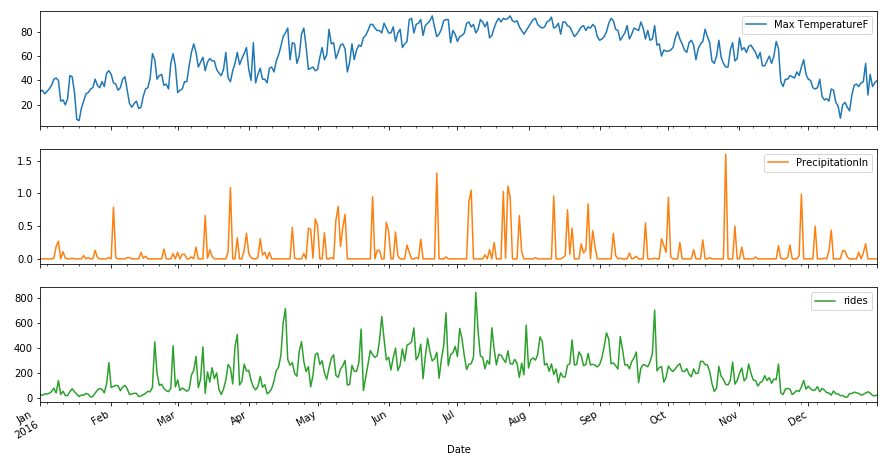

In [15]:
counts = weather.join(daily)
counts[['Max TemperatureF','PrecipitationIn','rides']].plot.line(subplots=True, figsize=(15,8))